# Clustering Algorithm : Feature Agglomeration


Agglomeration is bottom-up approach of Hierarchical Clustering that aims to build hierarchy of Clusters.

Implementing the Hierarchy by merging the clusters in the direction of features i.e, merging the features that are similar is called Feature Agglomeration.

Dataset : Digits dataset from scikit learn.

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

digits = load_digits()
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
float64


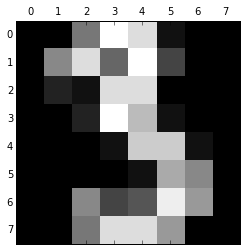

In [2]:
print digits.data
print digits.data.dtype
pl.gray() 
pl.matshow(digits.images[3]) 
pl.show()

Image is a Three Dimensional Array and Feature Agglomeration accepts only two dimensional data.Here we reshape the images to two dimension without changing its data.

In [3]:
images = digits.images
X = np.reshape(images, (len(images), -1))

n_clusters represents the number of clusters(regions) in the agglomerated data

In [4]:
connectivity = grid_to_graph(*images[0].shape)  
agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)

Fit the Hierarchical Clustering on the Data.The shape of X is 64(number of features) before agglomeration.
After trasnformation its(X-reduced) shape is 32(number of clusters provided above).So the number of features
is reduced from 64 to 32  by grouping the similar features.
The labels attributes gives the cluster assigned to each feature.
Now it is inverse transformed(X_restored) to match the number of features(64) where each feature is represented by cluster.


In [5]:
print "Number of Features initially ",X.shape
agglo.fit(X)
print "Cluster assigned to each feature ", agglo.labels_
X_reduced = agglo.transform(X)
print "After Agglomeration  ",X_reduced.shape
X_restored = agglo.inverse_transform(X_reduced)
print "Applying Transformation ", X_restored.shape

Number of Features initially  (1797, 64)
Cluster assigned to each feature  [ 9  9 31  1 27 17  0  8  9 24 26  1 25  6  0  8  9 24 11 23 28  6  0  8  9
  7 11 19 16 15  0  8  9  7  4 30 20 13  0  8  9  7  4 29  2  5  3  8  9  9
 21 18  2  5  3  8  9  9 14 12 22 10  3  8]
After Agglomeration   (1797, 32)
Applying Transformation  (1797, 64)


Total number of Leaves in the Cluster(equals to number of features)

In [6]:
agglo.n_leaves_

64

Reshaping the final data back to three dimensional array of images

In [7]:
images_restored = np.reshape(X_restored, images.shape)

Plotting the results of first four digits(0,1,2,3) before and after Feature Agglomeration

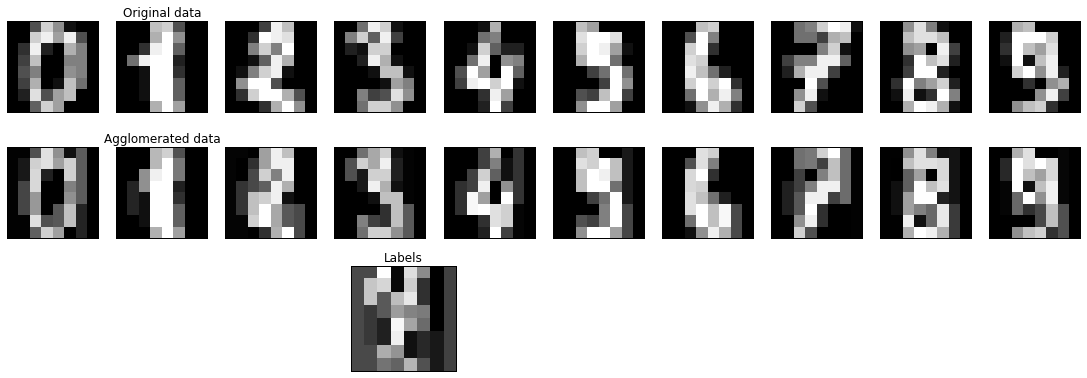

In [25]:
plt.figure(1, figsize=(5, 5.5))
plt.clf()
plt.subplots_adjust(left=.01, right=2.99, bottom=.01, top=.91)
for i in range(10):
    plt.subplot(3, 10, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title('Original data')
    plt.subplot(3, 10, 10 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16,
               interpolation='nearest')
    if i == 1:
        plt.title('Agglomerated data')
    plt.xticks(())
    plt.yticks(())

plt.subplot(3, 4, 10)
plt.imshow(np.reshape(agglo.labels_, images[0].shape),
           interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.title('Labels')
plt.show()

Reference: http://scikit-learn.org/stable/auto_examples/cluster/plot_digits_agglomeration.html#example-cluster-plot-digits-agglomeration-py